In [3]:
import av
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pims
import trackpy 
import trackpy as tp
from pims import ImageSequence
from Particledrop import Landing_Flashes

In [4]:
def trackpy_movie(movie, size, mmass):
    nf = movie.shape[0]
    f1 = trackpy.batch(movie[:,:,:], size, minmass=5, invert=False, processes='auto')
    t = trackpy.link(f1, 5, memory=0)
    
    t1 = trackpy.filter_stubs(t, 3)

    t2 = t1.rename(columns={'frame':'Frame'})
#     particles = t2['particle'].nunique()
#     print('Unique particles found:', + particles)
    
    # t2.groupby('Frame')['particle'].nunique().plot(kind='line')
    # plt.yticks(np.arange(0, particles+1, 5.0))
    # plt.xticks(np.arange(0, nf+1, 10.0))
    # plt.title('Number of landed particles over the series of frames')
    # plt.xlabel('Frame number')
    # plt.ylabel('Number of particles')
    # plt.grid()
    # plt.show()
    
    nparticles = []
    frames = np.arange(0,nf,1)

    for i in range(nf):
        temp = t2.loc[t2['Frame'] == i]
        nparticles.append(len(temp))

    plt.figure()
    plt.step(frames,nparticles)
    plt.yticks(np.arange(0, max(nparticles)+1, 2.0))
    plt.xticks(np.arange(0, nf+1, 5.0))
    plt.title('Stepfunction number of landed particles over the series of frames')
    plt.xlabel('Frame number')
    plt.ylabel('Number of particles')
    plt.grid()
    plt.show()
    
    t_hist = t2.drop_duplicates(subset=['particle'])
    plt.title('Found Mass Histogram')
    plt.hist(t_hist['mass'])
    plt.show()
    
#     plt.figure()
#     trackpy.annotate(t2[t2['Frame'] == nf-1], movie[nf-1]);
    
#     return t2, t_hist
    return

In [5]:
plt.rcParams['figure.figsize'] = (5, 5)

In [15]:
# video = r'C:\Users\brugg\Documents\MasterThesis\02062022\normal.avi'
video = r"E:\Ingmar\Ingmar\Experimental_data\14092022\Stuck\1_1000\bg_video.avi"

In [16]:
container = av.open(video)

for frame in container.decode(video=0):
    frame.to_image().save('Images/1409_1_1000/frame%d.jpg' % frame.index)
    frame.to_image()

In [17]:
images = ImageSequence('Images/1409_1_1000/frame*.jpg')
length = len(images)
print(length)

501


In [18]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel


frames1 = gray(pims.open('Images/1409_1_1000/*.jpg'))
# frames2 = gray(pims.open('FramesOverview2/*.jpg'))

In [19]:
frames1
nf1 = len(frames1)

In [37]:
# frames2
# nf2 = len(frames2)

In [38]:
# frames1[525]

In [39]:
# overview1 = tp.locate(frames1[525], 7, minmass=700, separation=15)

In [40]:
# overview1

In [41]:
# tp.annotate(overview1, frames1[525]);
# print(len(overview1['mass']))

In [42]:
# fig, ax = plt.subplots()
# ax.hist(overview1['mass'], bins=10)

# # Optionally, label the axes.
# ax.set(xlabel='mass', ylabel='count');

In [43]:
# frames2[366]

In [44]:
# overview2 = tp.locate(frames2[366], 7, minmass=700, separation=15)

In [45]:
# overview2

In [46]:
# tp.annotate(overview2, frames2[366]);
# print(len(overview2['mass']))

In [47]:
plt.rcParams['figure.figsize'] = (10, 10)

In [48]:
# fig, ax = plt.subplots()
# ax.hist(overview2['mass'], bins=10)

# # Optionally, label the axes.
# ax.set(xlabel='mass', ylabel='count');

In [49]:
# f = tp.batch(frames[0:50], 5, minmass=56)
# f = tp.batch(frames1[20:29], 7, minmass=700, maxsize=2.2, noise_size=1.2, separation=15)

In [50]:
# tp.quiet()  # Turn off progress reports for best performance
# t = tp.link(f, 8, memory=1, )

In [51]:
# t1 = tp.filter_stubs(t, 25)
# # Compare the number of particles in the unfiltered and filtered data.
# print('Before:', t['particle'].nunique())
# print('After:', t1['particle'].nunique())

In [52]:
# plt.figure()
# tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [53]:
# t2 = t1[((t1['mass'] > 750) & (t1['size'] < 2.6) &
#          (t1['ecc'] < 0.5))]

In [54]:
# plt.figure()
# tp.annotate(t2[t2['frame'] == 366], frames2[366]);

In [55]:
# plt.figure()
# tp.plot_traj(t2);

In [56]:
startframe = 0
endframe = nf1
startframe2 = 1  # +1 for accounting for the moving average
endframe2 = endframe-startframe

bgcorrected2 = frames1[startframe2:endframe2] - np.mean([frames1[startframe2-1:endframe2-1]])

print(bgcorrected2.shape)  # to check the shape of the array(frames,x,y)

(1400, 1024, 1024)


Frame 1399: 10474 features


(array([3.874032e+06, 9.920965e+06, 7.304320e+05, 6.124100e+04,
        2.677100e+04, 1.450700e+04, 4.562000e+03, 2.609000e+03,
        1.001000e+03, 1.190000e+02]),
 array([  6.39304395,  58.32547886, 110.25791377, 162.19034868,
        214.12278359, 266.05521851, 317.98765342, 369.92008833,
        421.85252324, 473.78495815, 525.71739306]),
 <BarContainer object of 10 artists>)

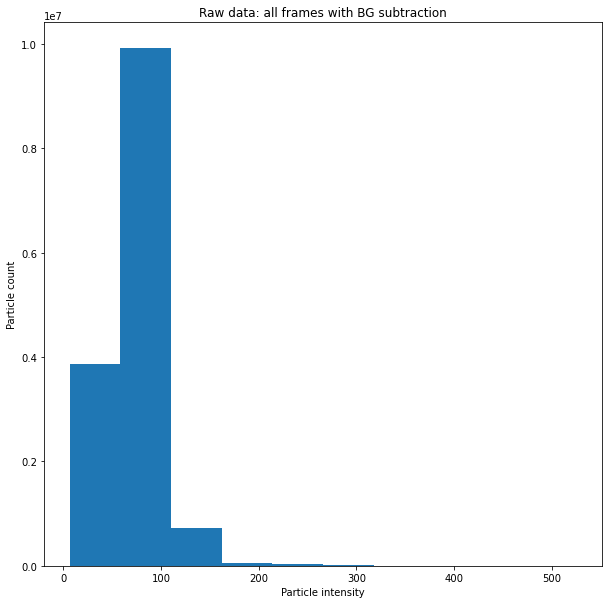

In [57]:
# t = tp.batch(bgcorrected2[:], 5, minmass=100, separation=15)
t = tp.batch(bgcorrected2[:], 5)
plt.title('Raw data: all frames with BG subtraction')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t['mass'])

(array([3.874032e+06, 9.920965e+06, 7.304320e+05, 6.124100e+04,
        2.677100e+04, 1.450700e+04, 4.562000e+03, 2.609000e+03,
        1.001000e+03, 1.190000e+02]),
 array([  6.39304395,  58.32547886, 110.25791377, 162.19034868,
        214.12278359, 266.05521851, 317.98765342, 369.92008833,
        421.85252324, 473.78495815, 525.71739306]),
 <BarContainer object of 10 artists>)

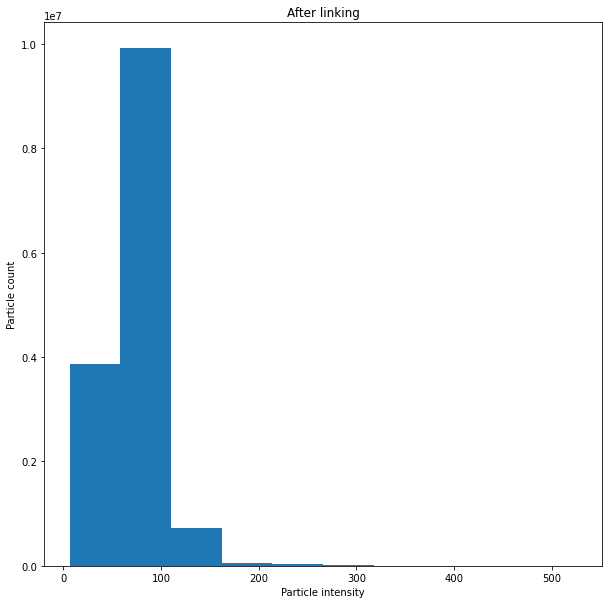

In [58]:
tp.quiet()  # Turn off progress reports for best performance
t1 = tp.link(t, 4, memory=2, )
plt.title('After linking')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t1['mass'])

(array([4.511190e+05, 1.069432e+06, 1.009160e+05, 1.667300e+04,
        8.942000e+03, 5.858000e+03, 3.230000e+03, 2.224000e+03,
        8.560000e+02, 1.040000e+02]),
 array([  7.85291762,  59.63936516, 111.42581271, 163.21226025,
        214.9987078 , 266.78515534, 318.57160288, 370.35805043,
        422.14449797, 473.93094552, 525.71739306]),
 <BarContainer object of 10 artists>)

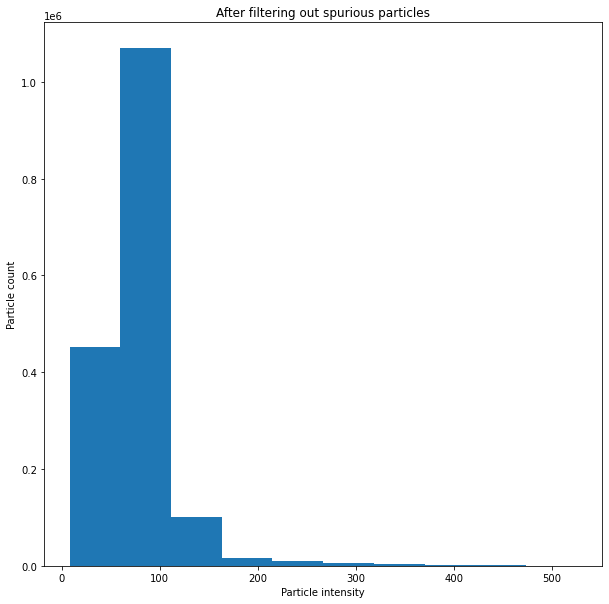

In [59]:
t2 = tp.filter_stubs(t1, 15)
plt.title('After filtering out spurious particles')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t2['mass'])

(array([6235., 5013., 4062., 2778., 1921., 1633., 1174.,  554.,  191.,
          21.]),
 array([200.00149893, 232.57308835, 265.14467776, 297.71626717,
        330.28785658, 362.859446  , 395.43103541, 428.00262482,
        460.57421424, 493.14580365, 525.71739306]),
 <BarContainer object of 10 artists>)

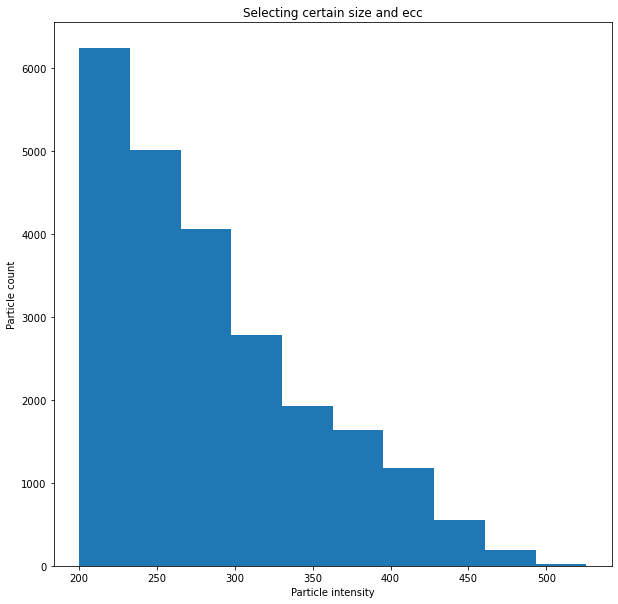

In [60]:
t3 = t2[((t2['mass'] > 200) & (t2['size'] < 2.6) &
         (t2['ecc'] < 0.5))]
plt.title('Selecting certain size and ecc')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t3['mass'])

Change to other frames sequence

(array([2.42730e+04, 1.70978e+05, 6.42240e+04, 1.76720e+04, 7.74700e+03,
        2.45200e+03, 5.51000e+02, 9.10000e+01, 1.00000e+01, 2.00000e+00]),
 array([ 40.97535743,  86.87438955, 132.77342167, 178.6724538 ,
        224.57148592, 270.47051804, 316.36955016, 362.26858229,
        408.16761441, 454.06664653, 499.96567865]),
 <BarContainer object of 10 artists>)

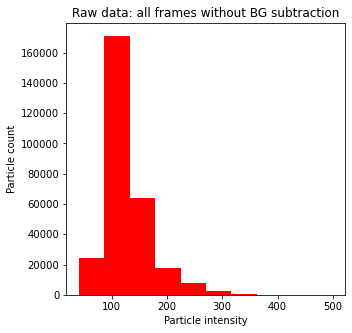

In [21]:
# t_a = tp.batch(frames1[:], 5, minmass=100, separation=15)
t_a = tp.batch(frames1[:], 5, separation=25)

plt.title('Raw data: all frames without BG subtraction')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_a['mass'], color='red')

(array([2.42730e+04, 1.70978e+05, 6.42240e+04, 1.76720e+04, 7.74700e+03,
        2.45200e+03, 5.51000e+02, 9.10000e+01, 1.00000e+01, 2.00000e+00]),
 array([ 40.97535743,  86.87438955, 132.77342167, 178.6724538 ,
        224.57148592, 270.47051804, 316.36955016, 362.26858229,
        408.16761441, 454.06664653, 499.96567865]),
 <BarContainer object of 10 artists>)

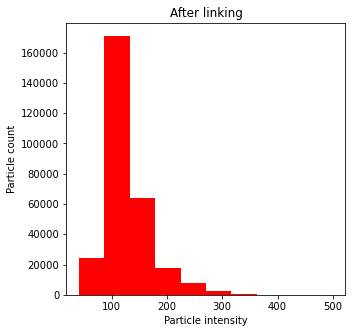

In [22]:
tp.quiet()  # Turn off progress reports for best performance
t_b = tp.link(t_a, 4, memory=2, )
plt.title('After linking')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_b['mass'], color='red')

(array([ 31.,  39.,  70.,  98., 175., 237., 289., 339., 380., 483., 504.,
        521., 599., 600., 594., 612., 577., 533., 520., 492., 424., 356.,
        280., 250., 229., 169., 134.,  87.,  62.,  33.,  26.,  21.,   7.,
          9.,   3.,   1.,   3.,   1.,   1.,   1.]),
 array([ 89.47461763,  98.41576129, 107.35690494, 116.29804859,
        125.23919225, 134.1803359 , 143.12147955, 152.06262321,
        161.00376686, 169.94491051, 178.88605417, 187.82719782,
        196.76834147, 205.70948513, 214.65062878, 223.59177243,
        232.53291609, 241.47405974, 250.4152034 , 259.35634705,
        268.2974907 , 277.23863436, 286.17977801, 295.12092166,
        304.06206532, 313.00320897, 321.94435262, 330.88549628,
        339.82663993, 348.76778358, 357.70892724, 366.65007089,
        375.59121454, 384.5323582 , 393.47350185, 402.4146455 ,
        411.35578916, 420.29693281, 429.23807646, 438.17922012,
        447.12036377]),
 <BarContainer object of 40 artists>)

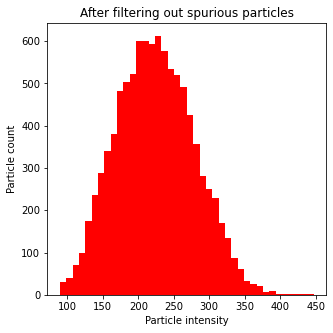

In [25]:
t_c = tp.filter_stubs(t_b, 15)
plt.title('After filtering out spurious particles')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_c['mass'], color='red', bins=40)

(array([ 94., 131., 199., 234., 263., 310., 394., 391., 417., 513., 503.,
        548., 488., 545., 494., 491., 466., 448., 399., 339., 265., 229.,
        227., 192., 149.,  97.,  85.,  54.,  31.,  22.,  24.,   6.,   9.,
          2.,   4.,   1.,   3.,   0.,   1.,   1.]),
 array([120.03399487, 128.21115409, 136.38831332, 144.56547254,
        152.74263176, 160.91979098, 169.09695021, 177.27410943,
        185.45126865, 193.62842787, 201.8055871 , 209.98274632,
        218.15990554, 226.33706476, 234.51422399, 242.69138321,
        250.86854243, 259.04570165, 267.22286088, 275.4000201 ,
        283.57717932, 291.75433854, 299.93149777, 308.10865699,
        316.28581621, 324.46297543, 332.64013466, 340.81729388,
        348.9944531 , 357.17161232, 365.34877155, 373.52593077,
        381.70308999, 389.88024921, 398.05740844, 406.23456766,
        414.41172688, 422.5888861 , 430.76604533, 438.94320455,
        447.12036377]),
 <BarContainer object of 40 artists>)

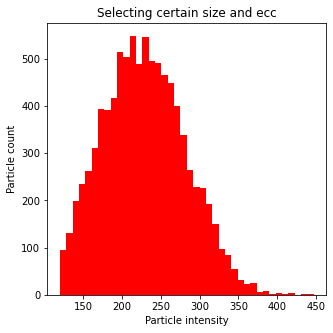

In [26]:
t_d = t_c[((t_c['mass'] > 120) & (t_c['size'] < 2.6) &
         (t_c['ecc'] < 0.5))]
plt.title('Selecting certain size and ecc')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_d['mass'], color='red', bins=40)